# Лабораторная работа 5 — Классификация (Вариант 4)

Набор данных: `bank_loan_default.csv` (вариант 4).

**Цель:** изучение алгоритмов и методов классификации на практике.

1. Загрузка набора данных и импорт библиотек

Также на экран были выведены размер датасета, первые 5 строк и информация о столбцах, которая показывает, что в данных нет пропусков и все типы данных соответствуют реальным данным

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, balanced_accuracy_score, confusion_matrix, 
                             roc_curve, roc_auc_score, )

# Настройка стиля графиков
sns.set_theme(style="whitegrid")

# Загрузка данных
df = pd.read_csv('bank_loan_default.csv')

# Обзор данных
print("Размер датасета:", df.shape)
display(df.head())
print("Информация о типах данных:")
display(df.info())

Размер датасета: (3041, 12)


,age,annual_income,employment_type,education,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,delinquency_30d,residence_type,Default
0,42,57272.0,Self-Employed,Masters,8516.0,5.85,48,730.0,10,No,Own,0
1,51,45786.0,Salaried,Masters,13760.0,9.97,36,677.0,7,No,Mortgage,0
2,69,42359.0,Salaried,Bachelors,2569.0,13.75,48,624.0,2,No,Own,0
3,65,50709.0,Self-Employed,Masters,13204.0,8.70,48,698.0,3,No,Rent,0
4,30,46272.0,Salaried,HS,7700.0,7.53,48,532.0,7,No,Rent,0


Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3041 non-null   int64  
 1   annual_income      3041 non-null   float64
 2   employment_type    3041 non-null   object 
 3   education          3041 non-null   object 
 4   loan_amount        3041 non-null   float64
 5   interest_rate_pct  3041 non-null   float64
 6   term_months        3041 non-null   int64  
 7   credit_score       3041 non-null   float64
 8   num_open_accounts  3041 non-null   int64  
 9   delinquency_30d    3041 non-null   object 
 10  residence_type     3041 non-null   object 
 11  Default            3041 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 285.2+ KB


None

Датасет содержит 3041 запись с информацией с данными о кредитах:
- age — возраст заёмщика (лет), числовой.
- annual_income — годовой доход, USD/год, числовой (широкий диапазон).
- employment_type — тип занятости: Salaried / Self-Employed / Unemployed, категориальный.
- education — образование: HS / Bachelors / Masters / PhD, категориальный.
- loan_amount — сумма кредита, USD, числовой (широкий диапазон).
- interest_rate_pct — процентная ставка по кредиту, % годовых, числовой.
- term_months — срок кредита, месяцев (набор фиксированных значений:24/36/48/60/72), числовой/категориальный.
- credit_score — кредитный скор (от 300 до 850), числовой.
- num_open_accounts — число открытых кредитных счетов, целочисленный счётчик.
- delinquency_30d — просрочка платежа 30 дней: Yes / No, категориальный.
- residence_type — жильё: Own / Rent / Mortgage, категориальный.
- Default — целевой класс: 1 — дефолт по кредиту, 0 — нет

2. Предобработка данных

Были использованы методы describe и value_counts для того чтобы оценить данные, видно что в них нет необычных выбросов или неявных дубликатов в категориальных данных

In [2]:
display(df.describe())
display(df['employment_type'].value_counts())
display(df['education'].value_counts())

,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,Default
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,47.088787,45746.182835,10683.309306,9.436271,47.696153,681.263400,4.545873,0.203880
std,15.600123,23572.506169,7384.866768,3.523466,13.883245,73.007065,2.175964,0.402947
min,21.000000,7433.000000,1016.000000,1.900000,24.000000,417.000000,0.000000,0.000000
25%,34.000000,28741.000000,5540.000000,7.150000,36.000000,632.000000,3.000000,0.000000
50%,47.000000,40826.000000,8797.000000,9.300000,48.000000,683.000000,4.000000,0.000000
75%,60.000000,57428.000000,13464.000000,11.440000,60.000000,733.000000,6.000000,0.000000
max,74.000000,237129.000000,69139.000000,33.888000,72.000000,850.000000,14.000000,1.000000


employment_type
Salaried         2132
Self-Employed     682
Unemployed        227
Name: count, dtype: int64

education
Bachelors    1181
HS            956
Masters       748
PhD           156
Name: count, dtype: int64

3. Была выделена целевая переменная Default: 1 — дефолт по кредиту, 0 — нет, которую необходимо предсказать. Эта
переменная была исключена из модели. Была построена матрица диаграмм рассеяния, в которой были выделены
значения целевой переменной разными цветами.

<Figure size 1000x1000 with 0 Axes>

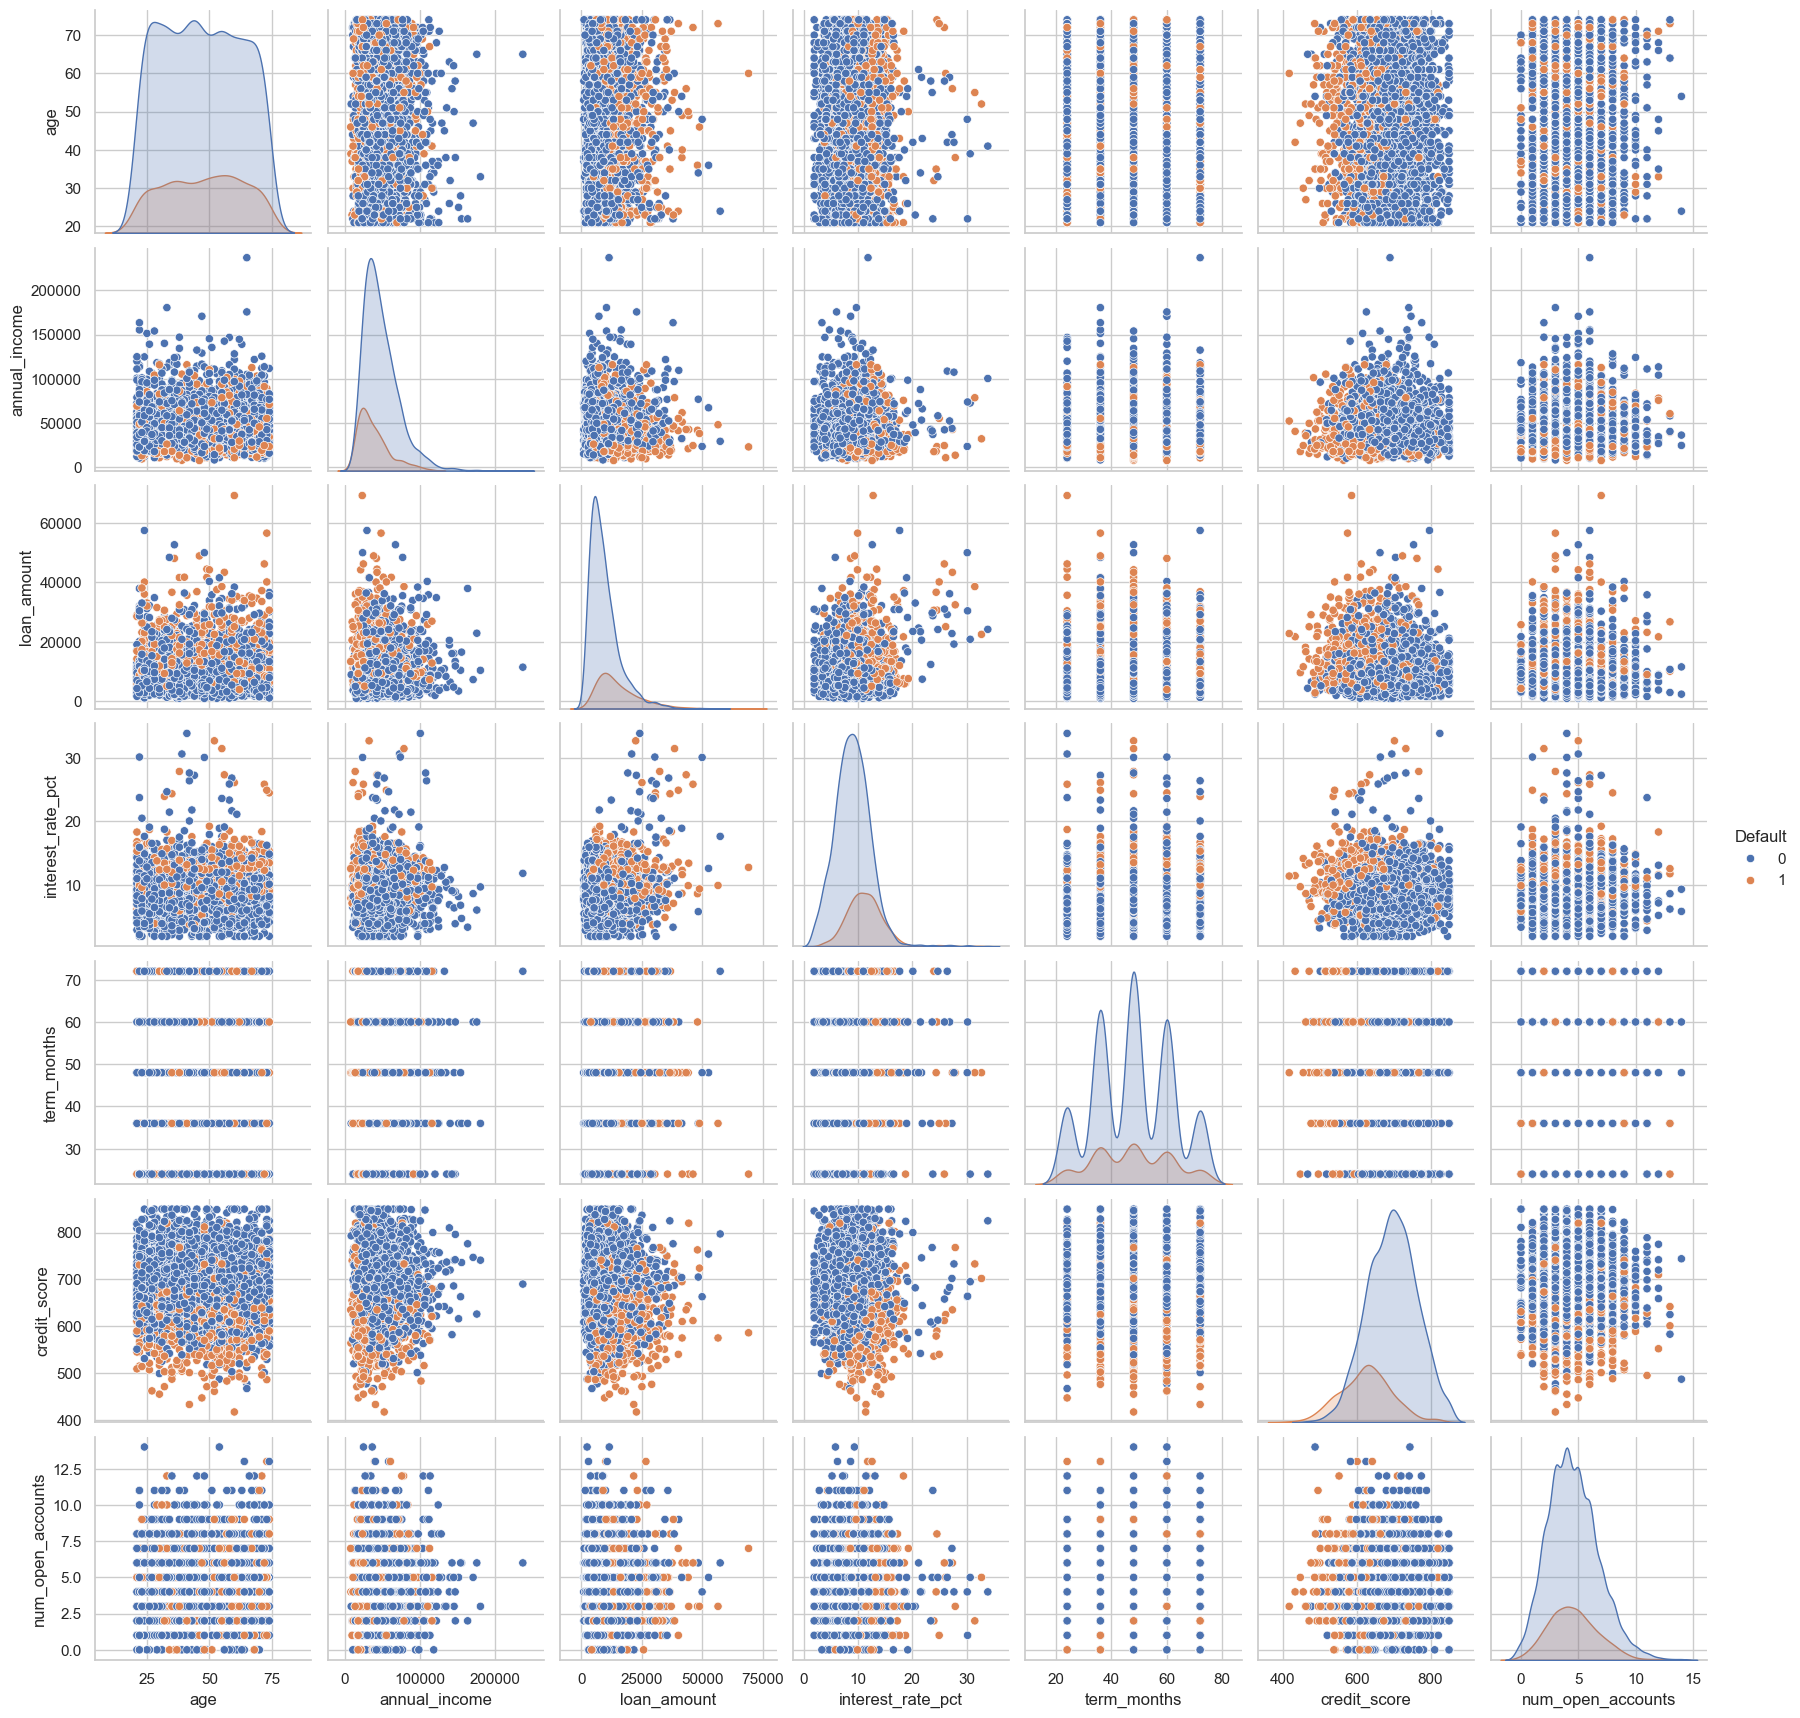

In [3]:
# Целевая переменная — Default (исключаем из признаков)
target_col = "Default"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

# Выделение числовых признаков
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# Матрица диаграмм рассеяния для числовых признаков, выделяя Default цветом
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=num_cols, hue='Default')
plt.show()


По полученным диаграммам можно сделать следующие выводы:
- Чаще всего дефолт происходит у людей с низким кредитным рейтнгом, с высокими процентными ставками по кредиту и с высокой суммой по кредиту
- Чаще дефолт по кредиту происходит у людей, которые берут более длительные кредиты (больше чем на 36 месяцев)
- Чаще всего дефолт происходит у людей с низким доходом, что является логичным
- С возрастом корреляция не столь сильна, заметно лишь, что у более старшего поколения (50+) показатель дефолтов выше


4. Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split и
выполнение стандартизации числовых данных.

Было применено One-Hot Encoding для категориальных признаков и StandardScaler для числовых признаков

Данные разделены на train и test выборки (70/30)

Так как KNN и логистическая регрессия требуют масштабирования, деревья и случайный лес - нет. Поэтому:

X_train_scaled, X_test_scaled - для KNN и LogReg

X_train, X_test - для DecisionTree и RandomForest

In [4]:
# One-Hot кодирование категориальных признаков
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Обновим списки признаков после кодирования
num_cols_encoded = [col for col in num_cols if col in X_encoded.columns]  

# Разделение на train/test выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y 
)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_encoded] = scaler.fit_transform(X_train[num_cols_encoded])
X_test_scaled[num_cols_encoded] = scaler.transform(X_test[num_cols_encoded])

print("Размеры выборок:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Размеры выборок:
Train: (2128, 15), Test: (913, 15)


5. Разработка предсказательной модели качественного отклика методами:
метод k- ближайших соседей, дерево решений, логистическая регрессия, случайный лес с помощью соответсвующих функций: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, RandomForestClassifier


In [5]:
# Обучение и предсказание методом KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Обучение и предсказание методом дерева решений
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Обучение и предсказание методом логистической регрессии
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Обучение и предсказание методом случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

6. Оценка ошибки классификации для каждого метода. Подсчет метрик "Accuracy",
"Precision", "Recall", "Balanced accuracy", 'F1 score'.

In [6]:
# Метрики методом KNN
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))

KNN
Accuracy: 0.828039430449069
Precision: 0.6526315789473685
Recall: 0.3333333333333333
F1-score: 0.4412811387900356
Balanced Accuracy: 0.6439706556625401


In [7]:
# Метрики методом дерева решений
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8335158817086528
Precision: 0.6075949367088608
Recall: 0.5161290322580645
F1-score: 0.5581395348837209
Balanced Accuracy: 0.7154235257576429


In [8]:
# Метрики методом логистической регресии
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8663745892661555
Precision: 0.7807017543859649
Recall: 0.478494623655914
F1-score: 0.5933333333333334
Balanced Accuracy: 0.7220533640975582


In [9]:
# Метрики методом случайного леса
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8400876232201533
Precision: 0.9347826086956522
Recall: 0.23118279569892472
F1-score: 0.3706896551724138
Balanced Accuracy: 0.6135281241218145


### 1. Общая картина: несбалансированные классы
Все модели показывают высокую общую точность (Accuracy) — от 82.8% до 86.6%, что на первый взгляд выглядит хорошо. Однако Recall (полнота) у всех моделей довольно низкая (от 23% до 52%), что указывает на серьёзный дисбаланс классов: модель чаще всего предсказывает отсутствие дефолта (класс 0) и пропускает реальные дефолты (класс 1). Это логично, так как дефолтов значительно меньше, но в задачах выявления дефолта Recall будет критичен — банк хочет минимизировать пропуск реальных дефолтов, даже если это приведёт к росту ложных срабатываний.

### 2. Сравнение моделей

#### Логистическая регрессия — лучший баланс
- Accuracy: 86.6% (самая высокая)
- Precision: 78.1% (высокая — мало ложных тревог)
- Recall: 47.8% (лучше, чем у KNN и Random Forest)
- F1-score: 0.593 (наивысший среди всех)

Вывод: логистическая регрессия демонстрирует — наилучший компромисс между обнаружением дефолтов и контролем ложных срабатываний. Подходит для практического применения для банковской сферы.

#### Дерево решений — наилучший Recall
- Recall: 51.6% — самый высокий среди всех моделей, следовательно лучше всех обнаруживает реальные дефолты.
- F1-score: 0.558 — второй по качеству.

Вывод: если главная цель — не пропустить дефолтных клиентов, дерево решений — может быть хорошим выбором, несмотря на более низкую точность (83%).

#### Random Forest — высокая точность, но плохой Recall
- Precision: 93.5% — почти все предсказанные дефолты действительно дефолты.
- Recall: всего 23.1% — модель пропускает 77% реальных дефолтов.
- Balanced Accuracy: самый низкий (61.4%) — хуже всего справляется с несбалансированностью.

Вывод: RF не подходит для этой задачи, несмотря на высокую точность. Он слишком редко предсказывает реальный дефолт.


#### KNN — слабый показатель по всем ключевым метрикам
- Самый низкий Recall (33%) и F1 (0.44).

Вывод: KNN демонстрирует наихудшее качество в данной задаче. Вероятно, страдает от высокой размерности и неоднородности признаков, даже после масштабирования.

### Итоговый вывод
Для задачи прогнозирования дефолта по кредиту:
- Лучшая модель с точки зрения общего качества — логистическая регрессия (высокий F1, хороший Recall и Precision).
- Если приоритет — обнаружить как можно больше дефолтов (даже ценой ложных срабатываний) — дерево решений предпочтительнее.
- Random Forest и KNN не рекомендуются: первый слишком редко предсказывает дефолты, второй просто нестабилен и неточен.

7. Построение матрицы неточностей с помощью confusion_matrix для каждого метода.

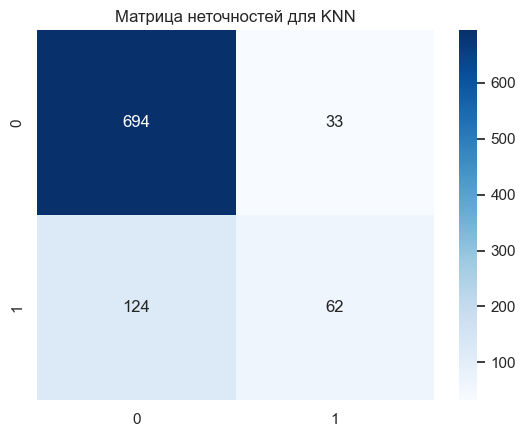

In [10]:
# Матрица неточностей KNN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей для KNN")
plt.show()

#### Выводы по матрице неточностей KNN

- Модель KNN показала среднюю точность в предсказании отрицательного класса (694 истинно отрицательных), и в общем она слабо справляется с истинными значениями. 
- Количество ложноотрицательных случаев (124) значительно превышает количество ложноположительных (33). Это говорит о том, что модель склонна к "пессимизму" — она чаще всего классифицирует объекты как не дефолтные, даже если они на самом деле являются дефолтными. Такое поведение нежелательно в задаче кредитного риска, где упущенные дефолты могут быть более затратными, чем ложные срабатывания.

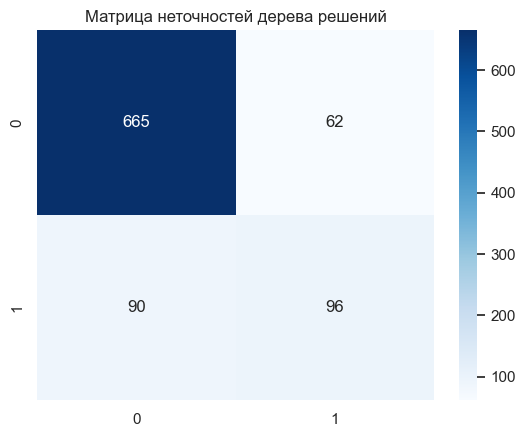

In [11]:
# Матрица неточностей дерева решений
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей дерева решений")
plt.show()

#### Выводы по матрице неточностей дерева решений
 
- Оно корректно определяет 665 отрицательных случаев (меньше всего) и 96 положительных (лучше всего). При этом количество ошибок распределено примерно поровну: 62 ложноположительных и 90 ложноотрицательных. 
- Модель не имеет явного перекоса в сторону одного из классов, но общее количество ошибок (152) является самым высоким среди всех рассмотренных моделей, что указывает на ее сравнительно низкую общую эффективность, но если критичнее всего узнать истинно положительные, то можно воспользоваться и этой моделью.

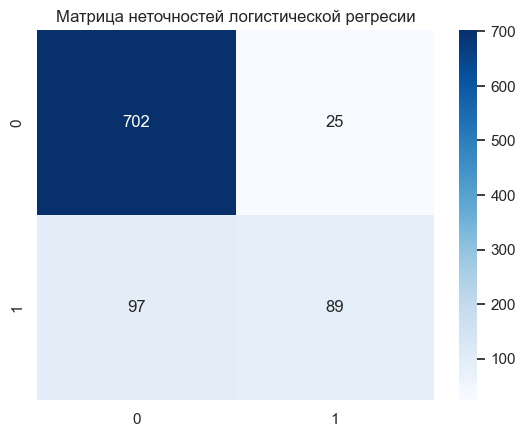

In [12]:
# Матрица неточностей логистической регресии
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей логистической регресии")
plt.show()

#### Выводы по матрице неточностей логистической регрессии

- Логистическая регрессия показала хорошие результаты, особенно в предсказании отрицательного класса (702 истинно отрицательных). 
- Ее главная слабость — это количество ложноотрицательных прогнозов (97), которое почти в четыре раза больше, чем ложноположительных (25). Подобно KNN, эта модель также проявляет "пессимизм", предпочитая не выявлять потенциальные дефолты, чтобы избежать ложных срабатываний. Однако общее количество ошибок (122) меньше, чем у всех дургих моделей, что делает ее самой надежной.

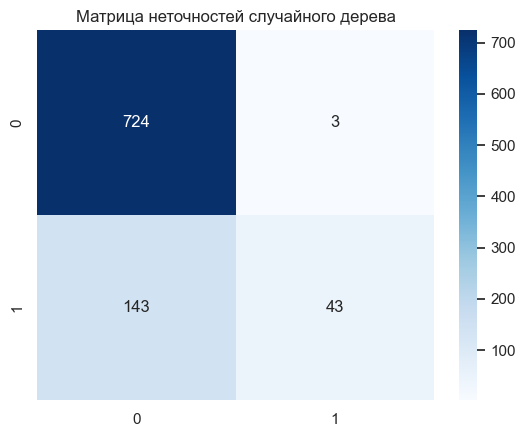

In [13]:
# Матрица неточностей случайного дерева
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей случайного дерева")
plt.show()

#### Выводы по матрице неточностей случайного леса

- Он достигает максимального числа истинно отрицательных прогнозов (724) и минимального числа ложноположительных (всего 3). 
- При этом количество ложноотрицательных случаев (143) является самым высоким среди всех. Эта модель является наиболее "оптимистичной" — она агрессивно выявляет потенциальные дефолты, что приводит к большому количеству ложных срабатываний, можно было бы выбрать эту модель, но количество истинно позитивных является самым низким, что говорит о высоких рисках модели. 

По полученным матрицам можно сделать следующие выводы:
- Самой сбаласированной моделью является модель логистической регресии, пусть она и не показывает лучших результатов ни в одном показателе, зато в среднем определяет дефолты лучше всех, для банковской сферы это был бы лучший вариант
- Также можно было бы рассмотреть возможность использования дерева решений, так как количество истинно положительных там выше всего
- Остальные же 2 модели сильно хуже, так как плохо выявляют истинно положительные значения, что критично в этой сфере

8. Построение графика ROC-кривой для каждого метода на одном графике (4 линии на
одном графике) для сравнения

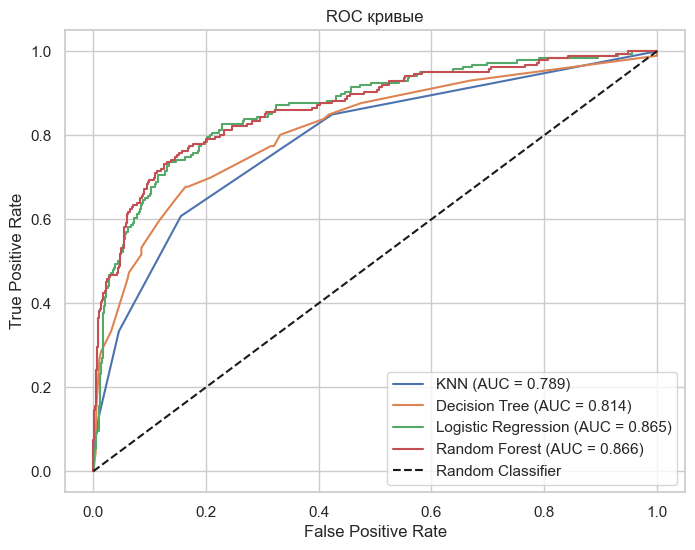

In [15]:
plt.figure(figsize=(8, 6))

# KNN
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1]):.3f})')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]):.3f})')

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]):.3f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.3f})')

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые')
plt.legend()
plt.grid(True)
plt.show()

#### Выводы:
1.  Общая эффективность моделей: Все четыре модели (KNN, Decision Tree, Logistic Regression, Random Forest) демонстрируют результаты, превышающие случайное предсказание (пунктирная линия с AUC=0.5). Это означает, что все они способны различать классы "дефолт" и "без дефолта" лучше, чем случайный угадыватель.

2. Сравнение моделей по AUC:
    * Лучшая модель: Логистическая регрессия (зеленая линия) показывает наилучший результат с площадью под кривой (AUC) 0.865. Ее кривая наиболее близка к идеальному верхнему левому углу (TPR=1, FPR=0), что говорит о высокой способности правильно классифицировать положительные случаи (дефолты) при минимальном количестве ложных срабатываний.
    * Второе место: Случайный лес (красная линия) следует сразу за ней с AUC 0.866. Разница в AUC между логистической регрессией и случайным лесом очень мала (всего 0.001), что указывает на их сопоставимую эффективность в данной задаче.
    * Третье место: Дерево решений (оранжевая линия) имеет AUC 0.814. Хотя это хороший результат, он заметно ниже, чем у двух лидеров.
    * Четвертое место: Метод k-ближайших соседей (синяя линия) показывает наименьшую эффективность среди рассмотренных моделей с AUC 0.789.

3.  Интерпретация кривых:
    * Кривая логистической регрессии и случайного леса проходят выше остальных во всем диапазоне значений FPR, что подтверждает их превосходство.
    * Кривая KNN начинается с более высокого значения TPR при очень малых FPR, но затем быстро отстает, что может указывать на то, что она хорошо работает при строгих порогах, но хуже обобщает при их ослаблении.
    * Кривая дерева решений имеет более "ступенчатый" вид, что характерно для этого алгоритма, и ее качество находится между KNN и двумя лучшими моделями.

## Выводы по работе:

В ходе выполнения лабораторной работы была решена задача бинарной классификации — прогнозирование дефолта по кредиту на основе датасета bank_loan_default.csv. Была проведена предварительная обработка: выполнено One-Hot-кодирование категориальных переменных и стандартизация числовых признаков с использованием StandardScaler. Набор данных был разделен на обучающую и тестовую выборки в соотношении 70/30.

Для решения задачи были реализованы и сравнены четыре метода классификации: k-ближайших соседей (KNN), дерево решений (Decision Tree), логистическая регрессия (Logistic Regression) и случайный лес (Random Forest). Оценка качества моделей проводилась по ключевым метрикам: Accuracy, Precision, Recall, F1-score, Balanced Accuracy и ROC AUC.

Наилучший баланс между точностью и полнотой продемонстрировала логистическая регрессия (F1 = 0.593, Recall = 0.478, Precision = 78.1%), что делает её наиболее подходящей моделью для практического применения в условиях, где важно обнаруживать дефолтных заёмщиков без чрезмерного роста ложных срабатываний. Дерево решений показало самый высокий Recall (0.516), то есть лучше всех выявляло реальные дефолты, но за счёт снижения точности. Случайный лес, несмотря на высокие значения Precision (0.935) обладал крайне низким Recall (0.231), что делает его малопригодным для данной задачи, так как он пропускает большинство дефолтов. Метод KNN оказался наименее эффективным по всем ключевым метрикам.

ROC-кривые подтвердили, что логистическая регрессия и случайный лес обладают сопоставимой способностью ранжировать клиентов по риску дефолта, однако только логистическая регрессия обеспечивает адекватный компромисс между обнаружением дефолтов и контролем ложных предупреждений.

доп задания 5, 8 10 + подробные пояснения

### Дополнительное задание №5
Осуществить подбор оптимальных параметров с помощью GridSearchCV для
дерева решений. Сравнить качество модели для подобранных параметров и
любых других.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Сетка параметров для перебора
# criterion: критерий качества разбиения (Джини или Энтропия)
# max_depth: максимальная глубина дерева (ограничиваем, чтобы не было переобучения)
# min_samples_leaf: минимальное число объектов в листе (чем больше, тем грубее модель)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Инициализация модели
dt = DecisionTreeClassifier(random_state=42)

# Запуск поиска
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Лучшие параметры для Дерева решений:", grid_search_dt.best_params_)
print("Лучшая точность: {:.4f}".format(grid_search_dt.best_score_))

# Сравнение
# Модель с лучшими параметрами
best_dt_model = grid_search_dt.best_estimator_
y_pred_best = best_dt_model.predict(X_test)

print('Модель с лучшими параметрами')
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_best))

print('Обычная модель')
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))

Лучшие параметры для Дерева решений: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
Лучшая точность: 0.8346
Модель с лучшими параметрами
Accuracy: 0.8346111719605696
Precision: 0.6114649681528662
Recall: 0.5161290322580645
F1-score: 0.5597667638483965
Balanced Accuracy: 0.7161112836668589
Обычная модель
Accuracy: 0.8335158817086528
Precision: 0.6075949367088608
Recall: 0.5161290322580645
F1-score: 0.5581395348837209
Balanced Accuracy: 0.7154235257576429


- Данный код предназначен для автоматического подбора оптимальных гиперпараметров для модели Дерева решений (DecisionTreeClassifier) с использованием метода сетчатого поиска с кросс-валидацией (GridSearchCV).

1. Определение сетки параметров (param_grid_dt): Задаются диапазоны для трех ключевых параметров дерева:
criterion (критерий разбиения: Джини или Энтропия).
max_depth (максимальная глубина дерева).
min_samples_leaf (минимальное количество образцов в листе).
2. Поиск лучших параметров (GridSearchCV): Метод перебирает все возможные комбинации параметров из сетки, обучая модель на 5-кратной кросс-валидации (cv=5) и оценивая ее по метрике accuracy.
3. Сравнение: После нахождения лучшей комбинации параметров, код сравнивает производительность:
Модели с лучшими параметрами (оптимизированной).
Обычной модели (вероятно, с параметрами по умолчанию).

Сравнение проводится на тестовой выборке (X_test, y_test) с использованием пяти метрик: Accuracy, Precision, Recall, F1-score и Balanced Accuracy

#### Выводы:
1. Оптимизация дала результат: Подбор гиперпараметров с помощью GridSearchCV привел к небольшому, но стабильному улучшению качества модели. Оптимизированная модель превосходит обычную по всем метрикам, кроме Recall.
2. Незначительное улучшение: Разница в метриках очень мала (в пределах 0.0007 до 0.0039). Это говорит о том, что скорее всего начальные (дефолтные) параметры модели уже были близки к оптимальным.
3. Recall не изменился: Способность модели находить положительные классы (Recall) осталась на том же уровне (0.5161), что и у обычной модели.
4. Лучшая Precision: Наибольший относительный прирост наблюдается в метрике Precision, что означает, что среди всех предсказаний положительного класса, сделанных оптимизированной моделью, доля правильных предсказаний немного выше.

### Дополнительное задание №8
Выполнить нормализацию данных с помощью MinMaxScaler, MaxAbsScaler и сравнить
полученные итоговые метрики с теми, что были получены на данных,
нормализованных с помощью StandardScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Список скейлеров для проверки
scalers = [
    ('StandardScaler', StandardScaler()), # Приводит к распределению (mean=0, std=1)
    ('MinMaxScaler', MinMaxScaler()),     # Сжимает все в диапазон [0, 1]
    ('MaxAbsScaler', MaxAbsScaler())      # Сжимает в диапазон [-1, 1], деля на макс. модуль
]

results_scalers = []

for name, scaler in scalers:
    pipe = make_pipeline(scaler, LogisticRegression(random_state=42, max_iter=1000))
    
    # Обучение
    pipe.fit(X_train, y_train)
    
    # Предсказывание
    y_pred = pipe.predict(X_test)
    
    # Подсчет метрик
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    bal = balanced_accuracy_score(y_test, y_pred)
    results_scalers.append({'Scaler': name, 'Accuracy': acc, 'F1-score': f1})
    print(f"{name}: Accuracy = {acc:.4f}, F1-score = {f1:.4f}, Recall = {rec:.4f}, Balanced Accuracy = {bal:.4f}, Precision = {pre:.4f}")


StandardScaler: Accuracy = 0.8664, F1-score = 0.8530, Recall = 0.4731, Balanced Accuracy = 0.7201, Precision = 0.7857
MinMaxScaler: Accuracy = 0.8576, F1-score = 0.8354, Recall = 0.3763, Balanced Accuracy = 0.6785, Precision = 0.8333
MaxAbsScaler: Accuracy = 0.8456, F1-score = 0.8167, Recall = 0.3118, Balanced Accuracy = 0.6470, Precision = 0.8169


- Данный код выполняет сравнительный анализ влияния различных методов масштабирования признаков (Feature Scaling) на производительность модели Логистической регрессии (Logistic Regression).

- Цель: Определить, какой из трех скейлеров (StandardScaler, MinMaxScaler, MaxAbsScaler) лучше всего подготавливает данные для обучения логистической регрессии.
- Механизм: Используется конвейер (Pipeline), который последовательно применяет выбранный скейлер, а затем обучает модель логистической регрессии. Это гарантирует, что масштабирование происходит корректно (обучение скейлера только на тренировочных данных).
- Оценка: Для каждого скейлера производится обучение, предсказание на тестовых данных (X_test, y_test) и оценка качества по метрикам Accuracy, Recall, Balanced Accuracy, Preccision и F1-score.

#### Выводы:
1. StandardScaler — безусловный лидер: StandardScaler не только лидирует по общим метрикам (Accuracy, F1-score), но и показывает значительно лучшие результаты по метрикам, критичным для работы с несбалансированными данными (Recall, Balanced Accuracy).

2. Критическое влияние на Recall (Полноту):
Recall при использовании StandardScaler составляет 0.4731.Это на 10 процентных пунктов выше, чем у MinMaxScaler (0.3763), и на 16 процентных пунктов выше, чем у MaxAbsScaler (0.3118).
Вывод: Стандартизация данных (приведение к среднему 0 и дисперсии 1) позволяет логистической регрессии гораздо лучше определять принадлежность к меньшинству (положительному) классу.
3. Улучшение сбалансированной точности:
Balanced Accuracy является более надежной метрикой, чем простая Accuracy, при дисбалансе классов.
StandardScaler обеспечивает Balanced Accuracy в 0.7201, что также является лучшим результатом. Это означает, что модель, обученная на стандартизированных данных, достигает лучшего баланса между правильной классификацией положительных и отрицательных классов.

Заключение: Для данной задачи и модели Логистической регрессии обязательно следует использовать StandardScaler. Другие методы масштабирования, хотя и дают приемлемую общую точность (Accuracy), сильно снижают способность модели корректно идентифицировать положительный класс, что подтверждается низкими значениями Recall и Balanced Accuracy.

### Дополнительное задание №10
Осуществить подбор оптимальных параметров с помощью GridSearchCV для
случайного леса. Сравнить качество модели для подобранных параметров и
любых других.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Сетка параметров
# n_estimators: количество деревьев в лесу (обычно чем больше, тем лучше, но дольше)
# max_features: сколько признаков рассматривать при поиске лучшего разбиения
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Инициализация
rf = RandomForestClassifier(random_state=42)

# Поиск
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1) # cv=3 для ускорения
grid_search_rf.fit(X_train, y_train)

# Результаты
print("Лучшие параметры для Случайного леса:", grid_search_rf.best_params_)
print("Лучшая точность: {:.4f}".format(grid_search_rf.best_score_))

# Сравнение
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

print('Модель с лучшими параметрами')
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Precision:", precision_score(y_test, y_pred_rf_best))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1-score:", f1_score(y_test, y_pred_rf_best))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf_best))

print('Обычная модель')
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))

Лучшие параметры для Случайного леса: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Лучшая точность: 0.8459
Модель с лучшими параметрами
Accuracy: 0.864184008762322
Precision: 0.8163265306122449
Recall: 0.43010752688172044
F1-score: 0.5633802816901409
Balanced Accuracy: 0.702674121074973
Обычная модель
Accuracy: 0.8400876232201533
Precision: 0.9347826086956522
Recall: 0.23118279569892472
F1-score: 0.3706896551724138
Balanced Accuracy: 0.6135281241218145


- Данный код предназначен для оптимизации гиперпараметров модели Случайного леса с использованием метода сетчатого поиска с кросс-валидацией (GridSearchCV).

1. Сетка параметров (param_grid_rf): Определяется набор параметров для перебора:
n_estimators: Количество деревьев (50, 100, 200).
max_depth: Максимальная глубина деревьев.
min_samples_split: Минимальное количество образцов для разделения узла.
max_features: Количество признаков, рассматриваемых при каждом разбиении ('sqrt' или 'log2').
2. Поиск (GridSearchCV): Инициализируется поиск, который перебирает все комбинации параметров, используя 3-кратную кросс-валидацию (cv=3) и оценивая качество по метрике accuracy.
3. Сравнение: После нахождения лучшей комбинации параметров, код сравнивает производительность оптимизированной модели (best_rf_model) с обычной моделью (вероятно, с параметрами по умолчанию) на тестовом наборе данных по пяти метрикам: Accuracy, Precision, Recall, F1-score и Balanced Accuracy.

#### Выводы:
1. Оптимизация дала значительный эффект: В отличие от примера с Деревом решений, здесь подбор гиперпараметров привел к кардинальному улучшению качества модели, особенно по метрикам, отражающим работу с меньшинством классов (Recall, F1-score, Balanced Accuracy).
2. Сдвиг в сторону Recall (Полноты):
Обычная модель была крайне консервативной (высокая Precision 0.9348), но плохо находила положительные примеры (очень низкий Recall 0.2312). Она редко ошибалась, когда предсказывала "положительный класс", но пропускала большинство реальных положительных случаев. Оптимизированная модель значительно увеличила Recall (с 0.2312 до 0.4301), почти в два раза улучшив способность находить положительные примеры.
3. Компромисс Precision/Recall: Увеличение Recall произошло за счет снижения Precision (с 0.9348 до 0.8163). Это означает, что оптимизированная модель делает больше ложноположительных предсказаний, но общая польза от нахождения большего числа истинно положительных примеров перевешивает этот недостаток.
4. Улучшение комбинированных метрик:
F1-score (гармоническое среднее Precision и Recall) вырос с 0.37 до 0.56, что указывает на гораздо более сбалансированную и эффективную модель.
Balanced Accuracy (сбалансированная точность) выросла с 0.61 до 0.70. Это подтверждает, что оптимизированная модель лучше справляется с классификацией обоих классов (положительного и отрицательного), что критически важно при дисбалансе классов.

Заключение: Проведение GridSearchCV для Случайного леса было чрезвычайно полезным. Оптимизация перевела модель из состояния, где она была слишком осторожной (высокая Precision, низкий Recall), в состояние, где она гораздо более сбалансирована и эффективна для данной задачи (значительно более высокие Recall, F1-score и Balanced Accuracy).